In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data-set/student-por.csv


In [2]:
##Pysftp could be used to automate updated files after each term to update the analysis and maintain a real time snap shot of the students' performance, 
##so I included that here for future reference.
##import pysftp

##with pysftp.Connection('hostname', username='me', password='secret') as sftp:

    ##with sftp.cd('/allcode'):           # temporarily chdir to allcode
       ## sftp.put('/pycode/filename')  	# upload file to allcode/pycode on remote
       ## sftp.get('remote_file')         # get a remote file

In this project, we will be exploring the Student Perfromance Data Set.

The following hypothesises will be tested:

Hypothesis: strong negative correlation between Absences and G3 score

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns
import random

##import data named students, dataframe
students = pd.read_csv("/kaggle/input/student-performance-data-set/student-por.csv")

##print dataframe with headers
students.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
students['Internal Student ID'] = [ random.randint(1,10000)  for k in students.index]

In [5]:
students.shape

(649, 34)

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               649 non-null    object
 1   sex                  649 non-null    object
 2   age                  649 non-null    int64 
 3   address              649 non-null    object
 4   famsize              649 non-null    object
 5   Pstatus              649 non-null    object
 6   Medu                 649 non-null    int64 
 7   Fedu                 649 non-null    int64 
 8   Mjob                 649 non-null    object
 9   Fjob                 649 non-null    object
 10  reason               649 non-null    object
 11  guardian             649 non-null    object
 12  traveltime           649 non-null    int64 
 13  studytime            649 non-null    int64 
 14  failures             649 non-null    int64 
 15  schoolsup            649 non-null    object
 16  famsup  

In [7]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Internal Student ID
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,9711
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,4340
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,4433
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1332
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1269


In [8]:
students.sort_values(by=['Internal Student ID'], inplace=True)
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Internal Student ID
202,GP,F,17,U,GT3,A,3,3,health,other,...,3,3,1,3,3,10,12,13,14,6
135,GP,F,16,U,GT3,A,3,4,services,other,...,2,1,1,4,5,12,15,13,14,28
540,MS,F,17,U,GT3,T,3,2,at_home,other,...,3,3,2,2,1,5,9,11,11,51
341,GP,F,19,U,GT3,T,4,4,health,other,...,3,4,2,3,2,2,14,13,13,57
17,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,1,4,2,13,14,14,75


In [9]:
##Data exploration look to see if there are null values in any columns
##G1, G2, G3 ar the grading periods so we need values there and activities is the column
## that indicates if a student is envolved in extra school activities
print(students.isnull().sum())

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
Dalc                   0
Walc                   0
health                 0
absences               0
G1                     0
G2                     0
G3                     0
Internal Student ID    0
dtype: int64


No columns contain null values

In [10]:
students = students.drop(columns=['address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime',
                                  'studytime','failures','famrel','higher','paid','nursery','activities','health',
                                  'Walc','Dalc','goout','freetime','romantic','internet','schoolsup','famsup'])
students.head()

,school,sex,age,absences,G1,G2,G3,Internal Student ID
202,GP,F,17,10,12,13,14,6
135,GP,F,16,12,15,13,14,28
540,MS,F,17,5,9,11,11,51
341,GP,F,19,2,14,13,13,57
17,GP,F,16,2,13,14,14,75


In [11]:
students.shape

(649, 8)

In [12]:
students.sex.nunique()

2

In [13]:
students.age.unique()


array([17, 16, 19, 15, 18, 21, 20, 22])

In [14]:
students.age.max()

22

In [15]:
students.school.unique()

array(['GP', 'MS'], dtype=object)

In [16]:
##Explore the stats pertaining to this data set.
##The describe() function computes a summary of statistics pertaining to the DataFrame columns
students.describe()

,age,absences,G1,G2,G3,Internal Student ID
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.659476,11.399076,11.570108,11.906009,4903.269646
std,1.218138,4.640759,2.745265,2.913639,3.230656,2950.570949
min,15.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,16.000000,0.000000,10.000000,10.000000,10.000000,2234.000000
50%,17.000000,2.000000,11.000000,11.000000,12.000000,4920.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000,7473.000000
max,22.000000,32.000000,19.000000,19.000000,19.000000,9998.000000


**Exploration and Analysis of G3 Scores:**

In [17]:
students.G3.max()

19

In [18]:
students.G3.min()

0

In [19]:
students.G3.mean()

11.906009244992296

Chart of the count of students for each G3 score.

<AxesSubplot:xlabel='G3', ylabel='count'>

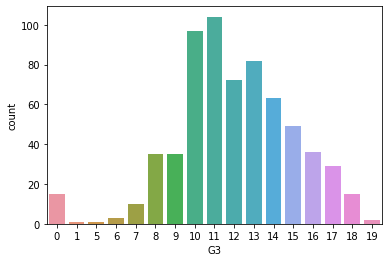

In [20]:
sns.countplot(x ='G3',data = students)

In [21]:
##counts of frequency of scores for G3
students['G3'].value_counts(ascending=False)

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

Data Exploration and Analysis of Absences:

In [22]:
students.absences.max()

32

In [23]:
students.absences.min()

0

In [24]:
students['absences'].value_counts()

0     244
2     110
4      93
6      49
8      42
10     21
12     12
5      12
1      12
16     10
14      8
3       7
9       7
11      5
7       3
18      3
22      2
21      2
15      2
24      1
30      1
32      1
13      1
26      1
Name: absences, dtype: int64

<AxesSubplot:xlabel='count', ylabel='absences'>

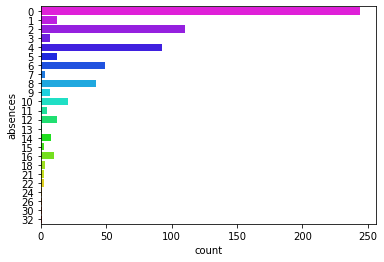

In [25]:
sns.countplot(y ='absences', data = students, palette = "gist_rainbow_r")

In [26]:
absences_mean = students['absences'].mean()
print('Absences Mean =', absences_mean)
##Mean number of absences is 3.7

Absences Mean = 3.6594761171032357


**Analysis of Absences vs. G3 Scores:**

Text(0, 0.5, 'G3 Score')

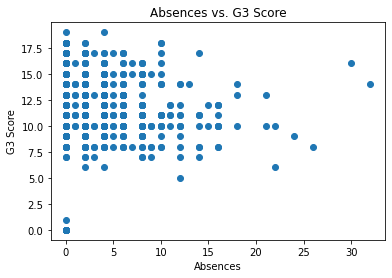

In [27]:
#create scatterplot of absences vs. score
plt.scatter(students.absences, students.G3)
plt.title('Absences vs. G3 Score')
plt.xlabel('Absences')
plt.ylabel('G3 Score')



In [28]:
##m = slope
m, b = np.polyfit(students.absences, students.G3, 1)
print(m)

-0.0636133725828013


In [29]:
##b=intercept
print(b)

12.138800862687447


Text(0, 0.5, 'G3 Score')

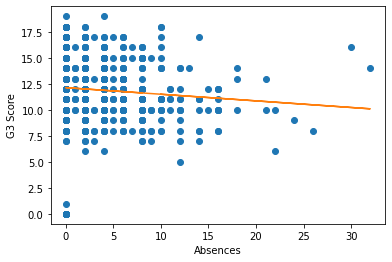

In [30]:
plt.plot(students.absences, students.G3, 'o')
plt.plot(students.absences, m*students.absences + b)
plt.xlabel('Absences')
plt.ylabel('G3 Score')

In [31]:
correlation_students = students.corr()
##calculate all correlations in df

print(correlation_students)


                          age  absences        G1        G2        G3  \
age                  1.000000  0.149998 -0.174322 -0.107119 -0.106505   
absences             0.149998  1.000000 -0.147149 -0.124745 -0.091379   
G1                  -0.174322 -0.147149  1.000000  0.864982  0.826387   
G2                  -0.107119 -0.124745  0.864982  1.000000  0.918548   
G3                  -0.106505 -0.091379  0.826387  0.918548  1.000000   
Internal Student ID  0.047371  0.038296  0.022453  0.030593  0.044148   

                     Internal Student ID  
age                             0.047371  
absences                        0.038296  
G1                              0.022453  
G2                              0.030593  
G3                              0.044148  
Internal Student ID             1.000000  


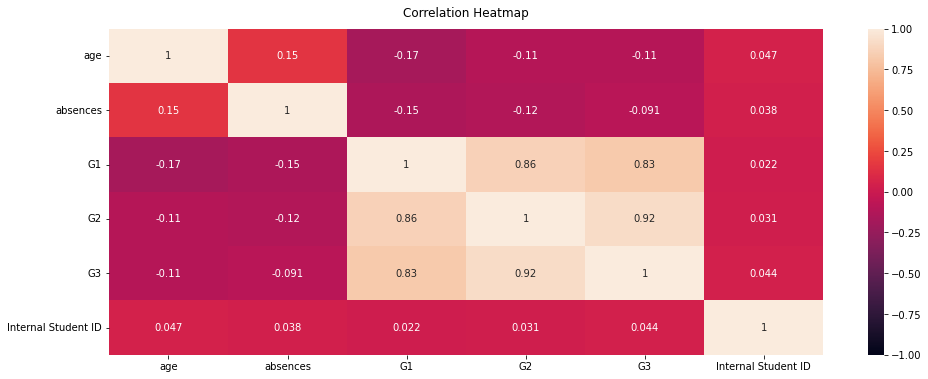

In [32]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(students.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [33]:
from scipy import stats
import scipy.stats


In [34]:
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
##Pearson correlation coefficient and p-value for testing non-correlation.
##2 tailed test, assumption is normal distribution
## returns r and p-value

r, p = stats.pearsonr(students.absences, students.G3)
print('r:',r)
print('P value:', p)

r: -0.09137905643875621
P value: 0.01989562393916793


In [35]:
x_threshold = 0.05
if p < 0.05:
    print('P value is < 0.05. The result is SIGNIFICANT')
     
else:
    print('P values is > 0.05, The result is not siginificant')

P value is < 0.05. The result is SIGNIFICANT


In [36]:
##convert G3 and absences into numpy arrays
G3_x = students['G3'].to_numpy()
A_y = students['absences'].to_numpy()

##degrees of freedom = sample size - number of pararmeters or relationhips
df = len(G3_x) - 2

##r = correlation coeff
r = students['G3'].corr(students['absences'])
print('R:', r)

##t = t value
t = r * np.sqrt(df/(1- r**2))
print('T: ', t)


R: -0.09137905643875614
T:  -2.33410092340771


Doubled Checked with P Value Online Calculator at 
https://www.statology.org/t-score-p-value-calculator/
Returns 0.01990, which matches the P Value from the pearsonr(). 

Grouping Students with similar attendnace rates:

In [37]:
grouped_absence = students.groupby('absences').agg({'G3': ['mean', 'min', 'max']})
print(grouped_absence)

                 G3        
               mean min max
absences                   
0         12.040984   0  19
1         12.416667  10  16
2         12.190909   6  18
3         10.428571   7  17
4         12.010753   6  19
5         11.750000   8  17
6         12.122449   8  17
7         13.000000   8  16
8         11.619048   7  16
9          9.714286   7  15
10        12.238095   8  18
11        11.200000  10  12
12        10.083333   5  14
13        14.000000  14  14
14        10.375000   7  17
15        11.000000  10  12
16        10.300000   8  12
18        12.333333  10  14
21        11.500000  10  13
22         8.000000   6  10
24         9.000000   9   9
26         8.000000   8   8
30        16.000000  16  16
32        14.000000  14  14


Text(0.5, 0, 'Absences')

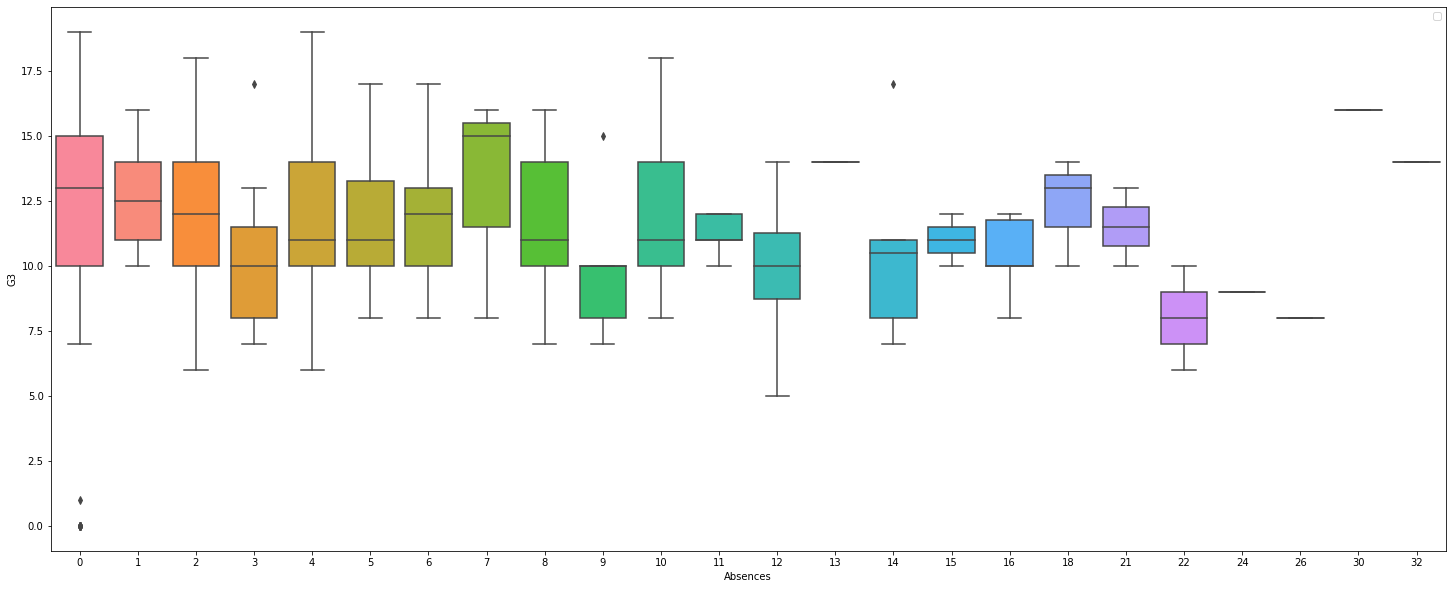

In [38]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'absences', y = 'G3', data = students, saturation=1)
plt.legend()
plt.ylabel('G3')
plt.xlabel('Absences')

##“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”

In [39]:
grouped_absence_mean = students.groupby('absences').agg({'G3': ['mean']})
print(grouped_absence_mean)

                 G3
               mean
absences           
0         12.040984
1         12.416667
2         12.190909
3         10.428571
4         12.010753
5         11.750000
6         12.122449
7         13.000000
8         11.619048
9          9.714286
10        12.238095
11        11.200000
12        10.083333
13        14.000000
14        10.375000
15        11.000000
16        10.300000
18        12.333333
21        11.500000
22         8.000000
24         9.000000
26         8.000000
30        16.000000
32        14.000000


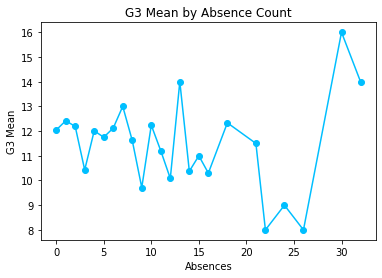

In [40]:
plt.plot(grouped_absence_mean, color = 'deepskyblue', marker='o')
plt.title('G3 Mean by Absence Count')
plt.xlabel('Absences')
plt.ylabel('G3 Mean')
plt.show()